## 0. Code Setup and Helper Functions

### 0.1 Import all necessary packages

In [1]:
import os
import zlib
import pickle as pkl
import sklearn
import pandas as pd
from tabulate import tabulate
from top2vec import Top2Vec
import sys
import importlib

2022-06-16 14:48:28.677497: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-16 14:48:28.677520: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### 0.2 Path Adjustments

In [2]:
assert os.path.exists('../src'), f"[ERROR] The path src not detected in the parent directory '{os.getcwd()}'."

if os.getcwd().endswith('/notebooks'):
    os.chdir('..')
    sys.path.append('./src')

print(f'[INFO] Current Directory: "{os.getcwd()}".')

[INFO] Current Directory: "/home/iceking/Desktop/22SS-TUM Lecture Docs/3. Praktikum (IN2106, IN4249)/Repo/topic-modeling-advancements".


## 1. Main Part

In [10]:
from src import top2vec_runner
importlib.reload(top2vec_runner)

args={
        #'dataset_dir': './data/crisis_resource_toy',
        'dataset_dir': './data/crisis_resource_12_labeled_by_paid_workers', # WORKS VERY WELL
        # 'dataset_dir': './data/20news_bydate',
        'data_col': 'text',
        'num_topics': 4,

        # ####### Top2Vec Specific Arguments - START #########
        # 'embedding_model': 'doc2vec',
        'embedding_model': 'universal-sentence-encoder-large', # WORKS VERY WELL
        # 'embedding_model': 'all-MiniLM-L6-v2',
        # 'embedding_model': 'distiluse-base-multilingual-cased',
        # 'doc2vec_speed': 'fast-learn',
        'min_count': 50,
        'umap_args': {
            'n_neighbors': 15,
            'n_components': 5,
            'metric': 'cosine',
            'random_state': 42  # Try to always include this for reproducibility, github.com/ddangelov/Top2Vec/issues/86
        },
        'hdbscan_args': {
            'min_cluster_size': 15,
            'metric': 'euclidean',
            'cluster_selection_method': 'eom'
        },
        # ####### Top2Vec Specific Arguments - END #########
}

model, df_output_doc_topic, df_output_topic_word = top2vec_runner.parametric_run(args)

2022-06-16 14:49:43,901 - top2vec - INFO - Pre-processing documents for training


[INFO] Top2Vec Parameters:
{
    "dataset_dir": "./data/crisis_resource_12_labeled_by_paid_workers",
    "data_col": "text",
    "num_topics": 4,
    "embedding_model": "universal-sentence-encoder-large",
    "min_count": 50,
    "umap_args": {
        "n_neighbors": 15,
        "n_components": 5,
        "metric": "cosine",
        "random_state": 42
    },
    "hdbscan_args": {
        "min_cluster_size": 15,
        "metric": "euclidean",
        "cluster_selection_method": "eom"
    }
}
[INFO] The embedding model folder:"./pretrained_models/universal-sentence-encoder" found, so no need to download.
[INFO] The embedding model folder:"./pretrained_models/universal-sentence-encoder-multilingual" found, so no need to download.
[INFO] The embedding model folder:"./pretrained_models/universal-sentence-encoder-large" found, so no need to download.
[INFO] The embedding model folder:"./pretrained_models/universal-sentence-encoder-multilingual-large" found, so no need to download.
[INFO] Top

2022-06-16 14:49:44,272 - top2vec - INFO - Loading universal-sentence-encoder-large model at ./pretrained_models/universal-sentence-encoder-large
2022-06-16 14:49:46.513729: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-16 14:49:46.513766: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-16 14:49:46.513792: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (iceking-ThinkPad-T490): /proc/driver/nvidia/version does not exist
2022-06-16 14:49:46.514111: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild Ten

[INFO] Original (Non-reduced) Number of Topics: 57.
[INFO] Topic #00:
     > From Reduced Model:True.
     > Topic Size:2899.
     > Topic Words: ['https' 'flooding' 'flood' 'floods' 'flooded' 'rain' 'earthquake' 'storm'
		 'co' 'wildfires' 'cyclone' 'aftermath' 'cyclonedebbie' 'river' 'fort'
		 'emergency' 'queensland' 'wildfire' 'update' 'tcdebbie' 'houston'
		 'mcmurray' 'water' 'convoy' 'qld' 'fuck' 'warning' 'safe' 'pm' 'warnings'
		 'tropical' 'coast' 'san' 'omg' 'weather' 'damn' 'brisbane' 'fires' 'amp'
		 'devastating' 'massive' 'oakland' 'flash' 'shit' 'evacuees' 'caused'
		 'alberta' 'lol' 'bay' 'affected']
     > Topic Word Scores: [0.39333665 0.38990444 0.38318762 0.36542958 0.34301054 0.23169059
		 0.21048774 0.19464469 0.182156   0.16474894 0.15705527 0.1345576
		 0.12576453 0.12525046 0.12026727 0.11960712 0.11552816 0.11271819
		 0.10850622 0.10787591 0.1048325  0.10441276 0.10359138 0.10310618
		 0.10252497 0.09338789 0.09186968 0.08713224 0.08662818 0.08283908
		 0.08

In [11]:
df_output_doc_topic

,run_id,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
4266,1655383783,0,"TheReformedCrow Nah, I'm gonna go with earthq...",earthquakes_eyewitness_crowdflower_2000,1,0.697593
3131,1655383783,1,I think we just had an earthquake,earthquakes_eyewitness_crowdflower_2000,1,0.860090
3252,1655383783,2,Uhh who else felt that earthquake tho,earthquakes_eyewitness_crowdflower_2000,1,0.844083
3844,1655383783,3,Bay area just had a nice size earthquake,earthquakes_eyewitness_crowdflower_2000,1,0.780927
4463,1655383783,4,Thought my dad was farting...turns out it was ...,earthquakes_eyewitness_crowdflower_2000,1,0.642015
...,...,...,...,...,...,...
7671,1655383783,7995,Due to the severity of the weather and ex trop...,hurricanes_eyewitness_crowdflower_2000,3,0.595725
1061,1655383783,7996,Wot ? Ј3 is my Wet Weather Plan today? ѕ‘4 #TC...,hurricanes_eyewitness_crowdflower_2000,0,0.526985
6813,1655383783,7997,Folks! The rain in South East Queensland is co...,hurricanes_eyewitness_crowdflower_2000,3,0.771620
7686,1655383783,7998,"Ahh man, i just realised I have to put the bin...",hurricanes_eyewitness_crowdflower_2000,3,0.590884


In [12]:
df_output_topic_word

,run_id,method,method_specific_params,dataset_name,data_col,num_given_topics,reduced,topic_num,topic_size,topic_words,word_scores,num_detected_topics,num_final_topics,duration_secs
0,1655383783,top2vec,"{'doc2vec_speed': None, 'min_count': 50, 'embe...",crisis_resource_12_labeled_by_paid_workers,text,4,True,0,2899,"[https, flooding, flood, floods, flooded, rain...","[0.39333665, 0.38990444, 0.38318762, 0.3654295...",57,4,107.247
1,1655383783,top2vec,"{'doc2vec_speed': None, 'min_count': 50, 'embe...",crisis_resource_12_labeled_by_paid_workers,text,4,True,1,1938,"[earthquake, cyclone, floods, wildfires, flood...","[0.8064817, 0.34666663, 0.3250006, 0.3172986, ...",57,4,107.247
2,1655383783,top2vec,"{'doc2vec_speed': None, 'min_count': 50, 'embe...",crisis_resource_12_labeled_by_paid_workers,text,4,True,2,1668,"[wildfires, wildfire, fires, fire, mcmurray, b...","[0.5055701, 0.45510513, 0.37270617, 0.29685372...",57,4,107.247
3,1655383783,top2vec,"{'doc2vec_speed': None, 'min_count': 50, 'embe...",crisis_resource_12_labeled_by_paid_workers,text,4,True,3,1495,"[cyclone, debbie, storm, floods, flooding, que...","[0.4378389, 0.33115822, 0.33046865, 0.28354678...",57,4,107.247


## Visualization Part (Draft)

### Draw 2D Document Vectors 

[INFO] UMAP Arguments for Visualization:{'n_neighbors': 15, 'n_components': 2, 'metric': 'cosine', 'random_state': 42}


<AxesSubplot:>

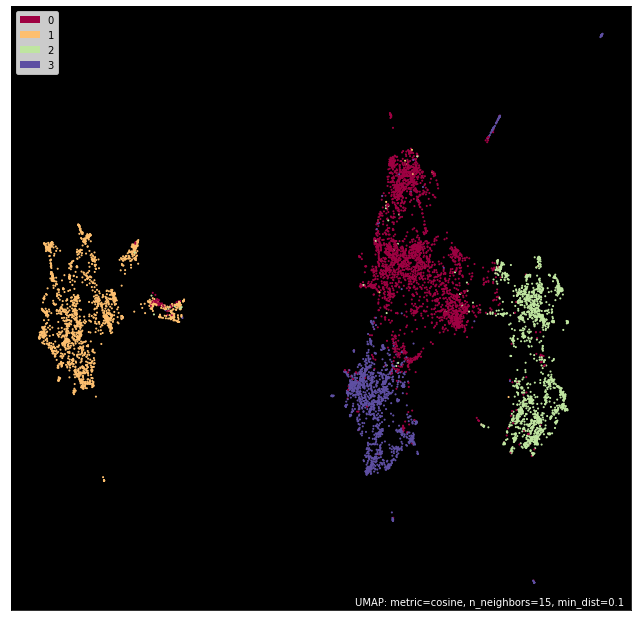

In [16]:
visualization_umap_args = df_output_topic_word['method_specific_params'][0]['umap_args'].copy()
visualization_umap_args.update({'n_components':2})
print(f'[INFO] UMAP Arguments for Visualization:{visualization_umap_args}')

import umap.plot
doc_topics = model.doc_top_reduced if df_output_topic_word['reduced'][0] else model.doc_top
umap_model = umap.UMAP(**visualization_umap_args).fit(model.document_vectors)

umap.plot.points(umap_model, labels=doc_topics,theme="viridis")

### DRAFTY

### Word Clouds

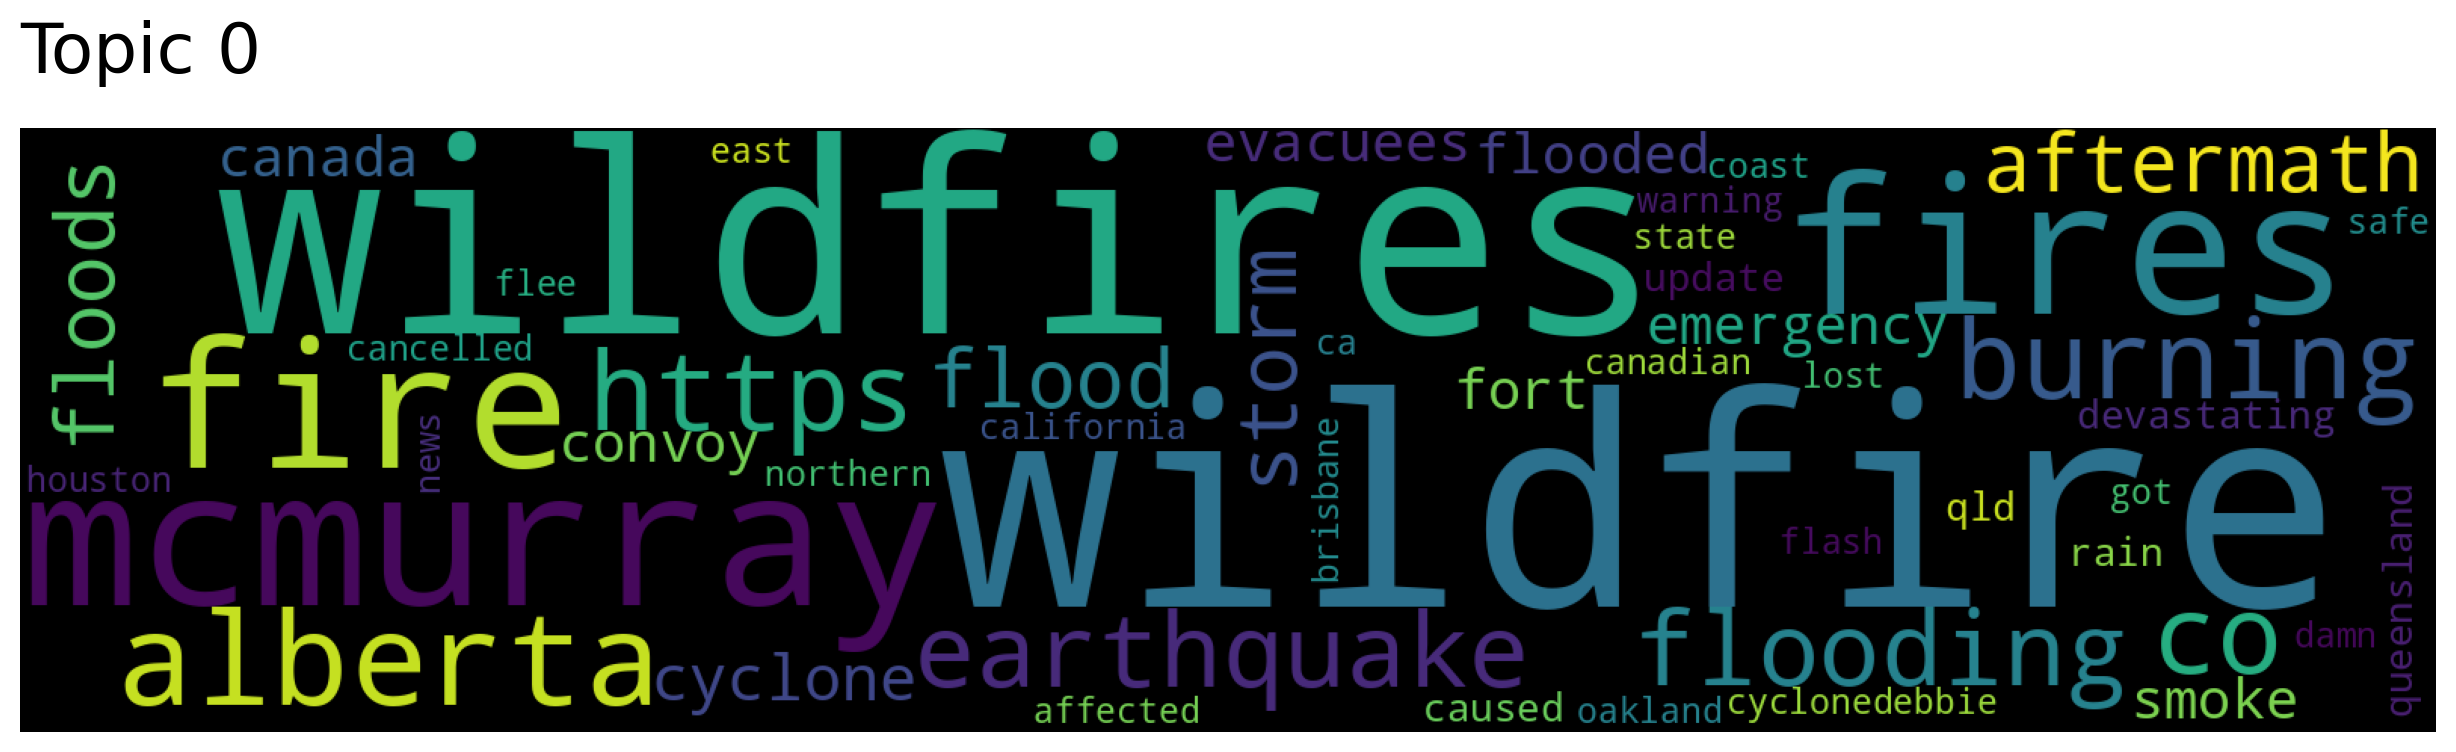

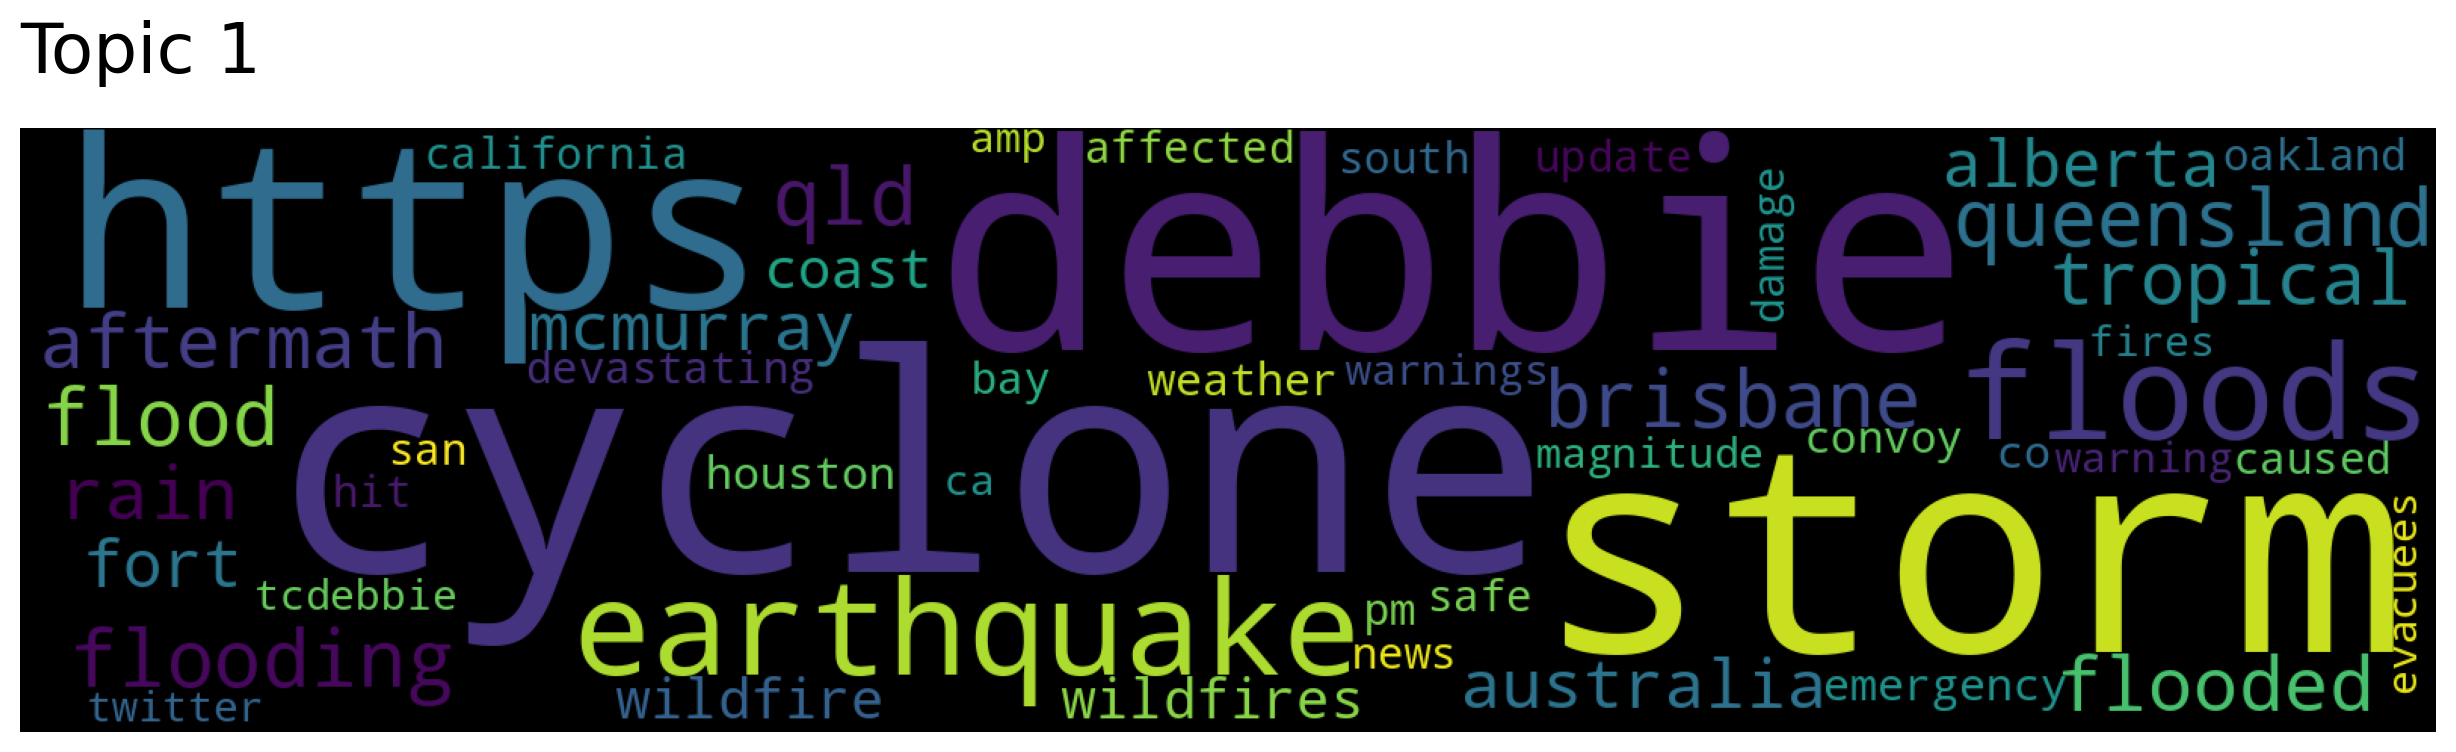

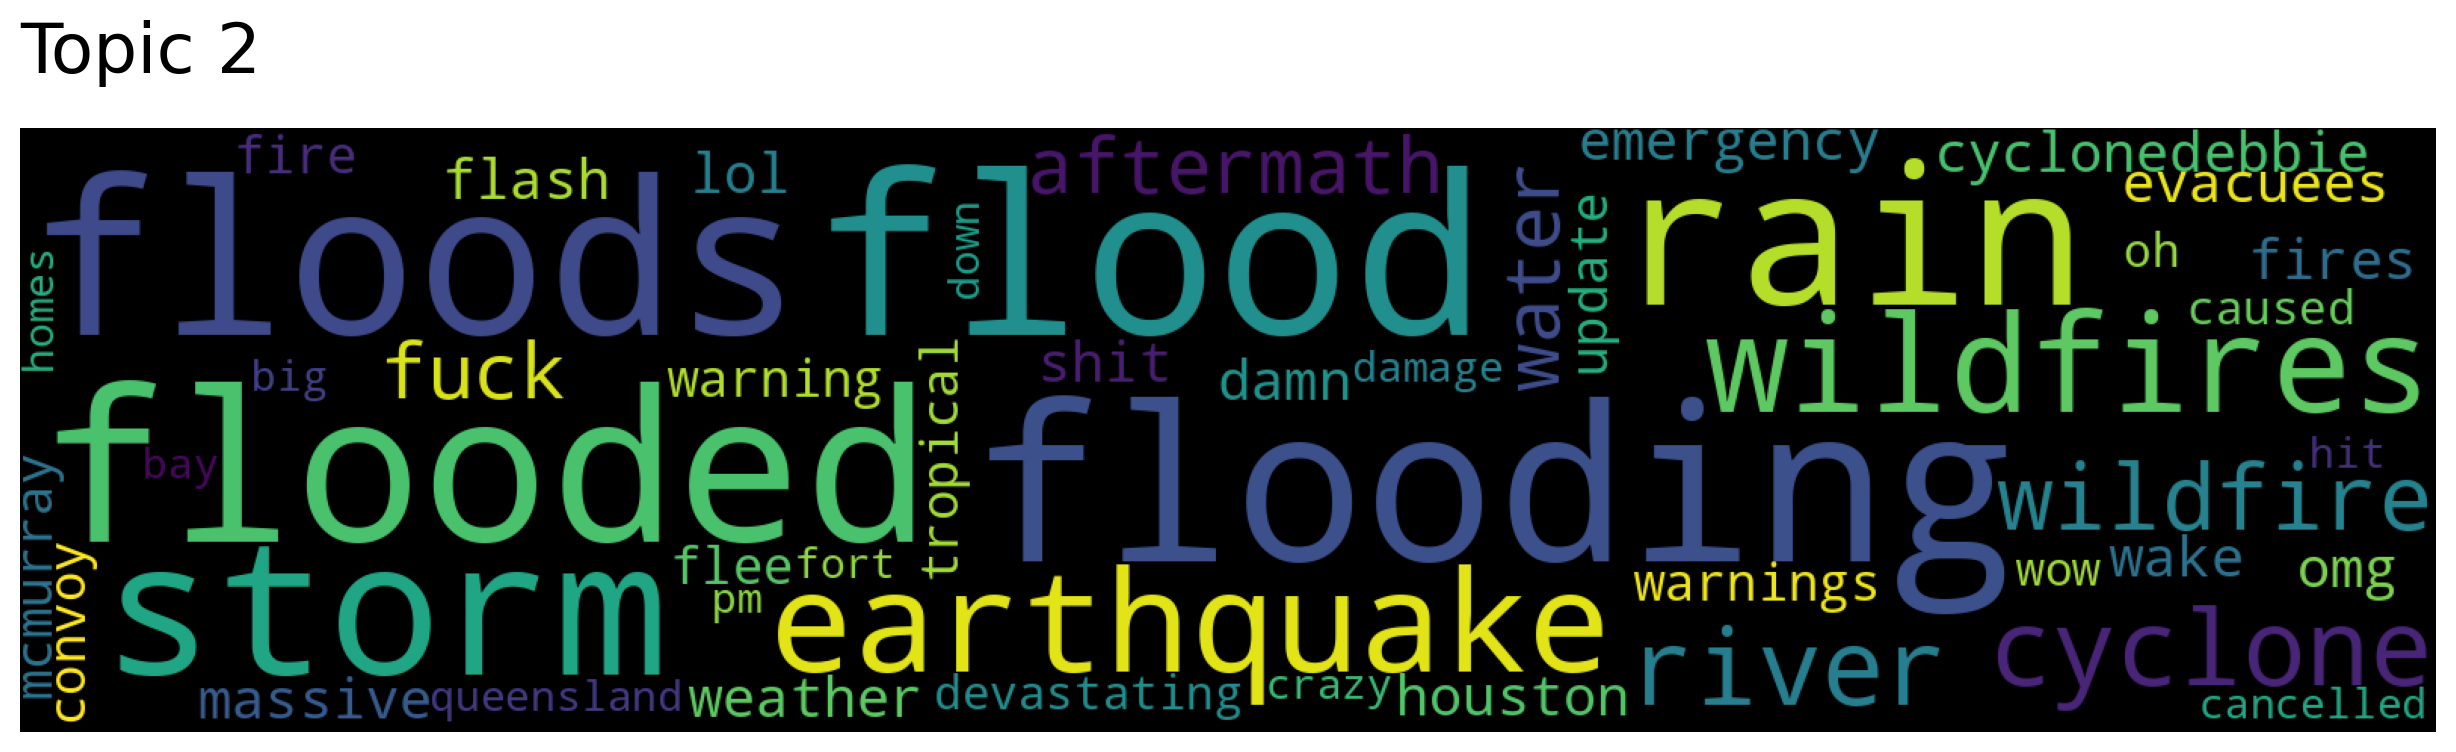

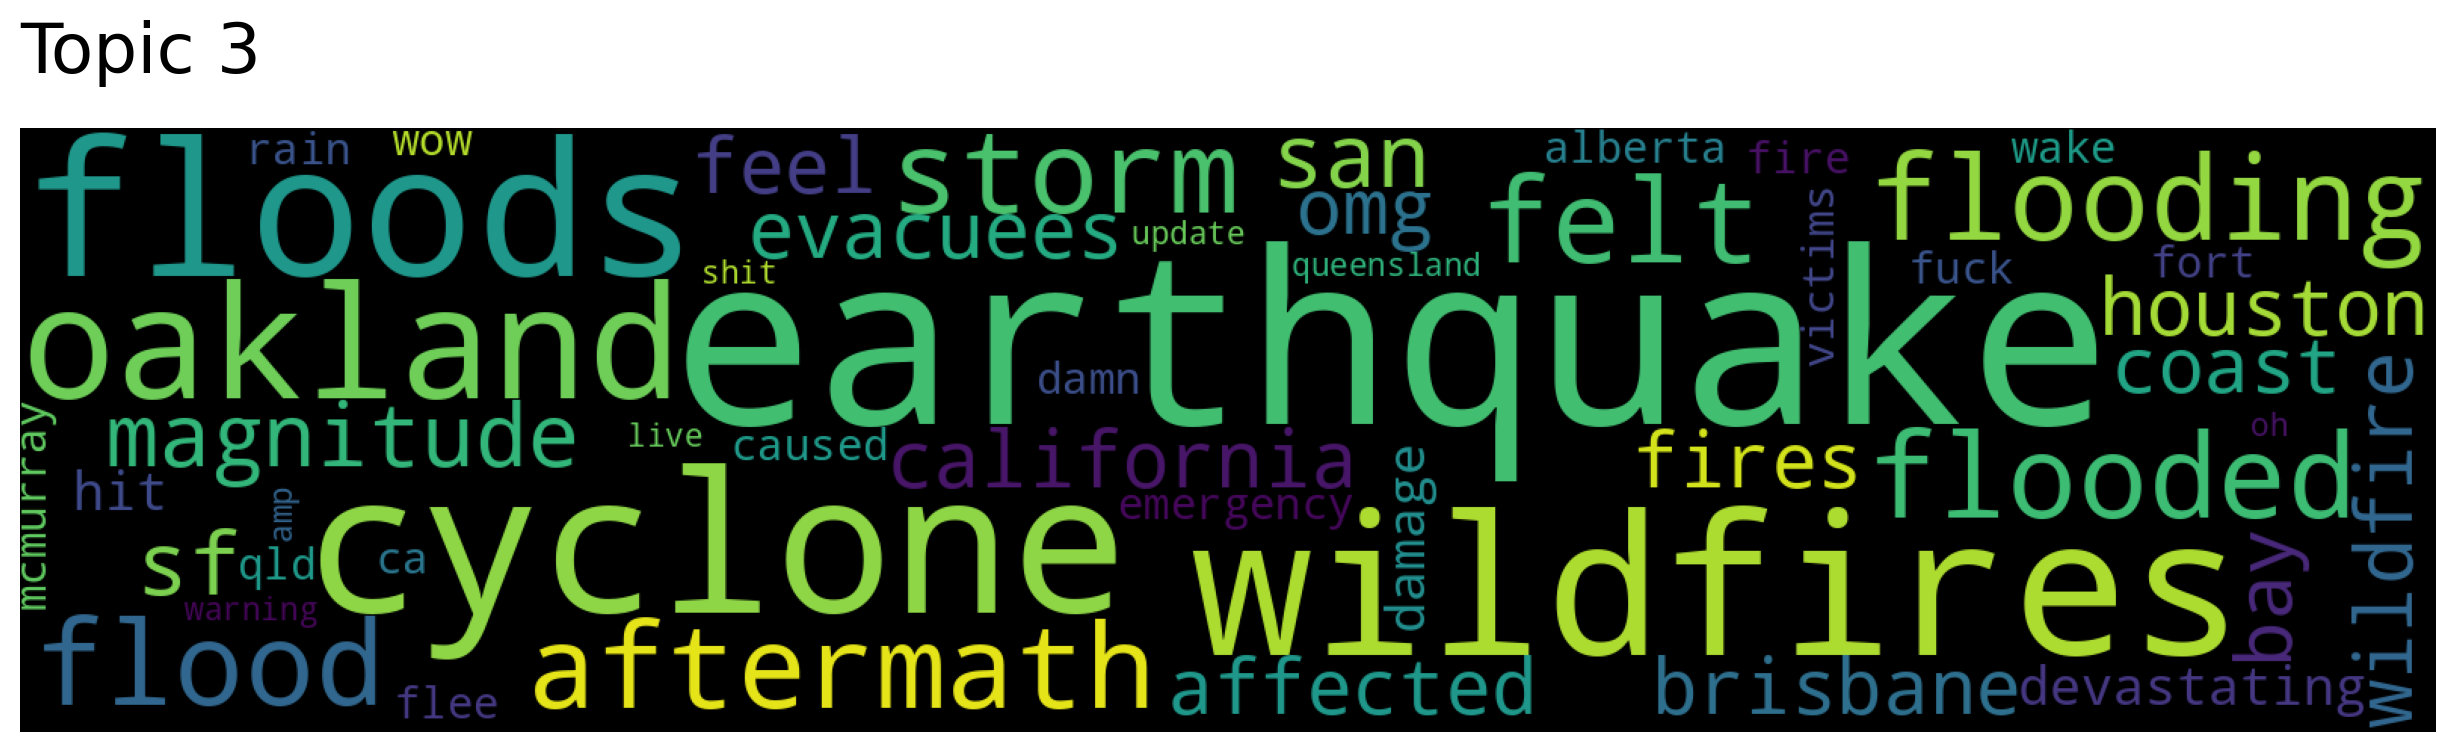

In [119]:
for topic_stat in topic_stats:
    model.generate_topic_wordcloud(topic_stat['topic_num'])

In [ ]:
model_output_df.to_json('asd.json',orient='records')

## Evaluation Part (Draft)

In [7]:
for i in range(len(df_output_topic_word)):
    print(f'Topic {i}:')
    print(df_output_doc_topic.query(f'`Assigned Topic Num` == {i}') ['Real Label'].value_counts())
    print('-'*32)

Topic 0:
floods_eyewitness_crowdflower_100         99
forestfires_eyewitness_crowdflower_100    99
hurricanes_eyewitness_crowdflower_100     99
Name: Real Label, dtype: int64
--------------------------------
Topic 1:
earthquakes_eyewitness_crowdflower_100    99
Name: Real Label, dtype: int64
--------------------------------


In [ ]:
# -----------------------

In [45]:
model_output = {"topics":[topic_stat['topic_words'] for topic_stat in topic_stats]}

from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence
for topk_val in range(1,30):
    metric_diversity = TopicDiversity(topk=topk_val)
    metric_coherence = Coherence(texts = [d.split(" ") for d in documents], topk = topk_val, measure = "c_v")
    score_diversity = metric_diversity.score(model_output)
    score_coherence = metric_coherence.score(model_output)
    print(f'> topk={topk_val},score_diversity={"%.2f" % score_diversity},score_coherence={"%.2f" %score_coherence}')

> topk=1,score_diversity=1.00,score_coherence=1.00
> topk=2,score_diversity=0.75,score_coherence=0.33
> topk=3,score_diversity=0.67,score_coherence=0.26
> topk=4,score_diversity=0.62,score_coherence=0.40
> topk=5,score_diversity=0.60,score_coherence=0.40
> topk=6,score_diversity=0.58,score_coherence=0.40
> topk=7,score_diversity=0.57,score_coherence=0.40
> topk=8,score_diversity=0.62,score_coherence=0.40
> topk=9,score_diversity=0.61,score_coherence=0.40
> topk=10,score_diversity=0.55,score_coherence=0.40
> topk=11,score_diversity=0.55,score_coherence=0.40
> topk=12,score_diversity=0.54,score_coherence=0.40
> topk=13,score_diversity=0.54,score_coherence=0.40
> topk=14,score_diversity=0.54,score_coherence=0.40
> topk=15,score_diversity=0.53,score_coherence=0.40
> topk=16,score_diversity=0.56,score_coherence=0.40
> topk=17,score_diversity=0.56,score_coherence=0.40
> topk=18,score_diversity=0.53,score_coherence=0.40
> topk=19,score_diversity=0.50,score_coherence=0.40


Exception: Words in topics are less than 20